In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


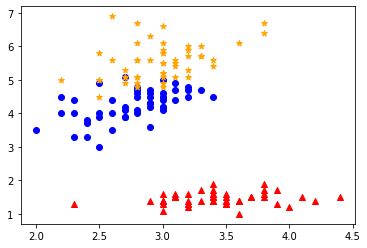

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())
fig, ax = plt.subplots()
for i, data in enumerate(zip(iris.data[:, 1], iris.data[:, 2])):
    if iris.target[i] == 0:
        ax.scatter(data[0], data[1], c="red", marker="^")
    elif iris.target[i] == 1:
        ax.scatter(data[0], data[1], c="blue", marker="o")
    else :
        ax.scatter(data[0], data[1], c="orange", marker="*")

In [17]:
X,y = iris.data, iris.target
agc = AgglomerativeClustering()
agc_dendrogram = AgglomerativeClustering(n_clusters=None, 
                                distance_threshold=0)
agc.fit(X)
agc_dendrogram.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

In [24]:
result = agc.fit_predict(X)
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

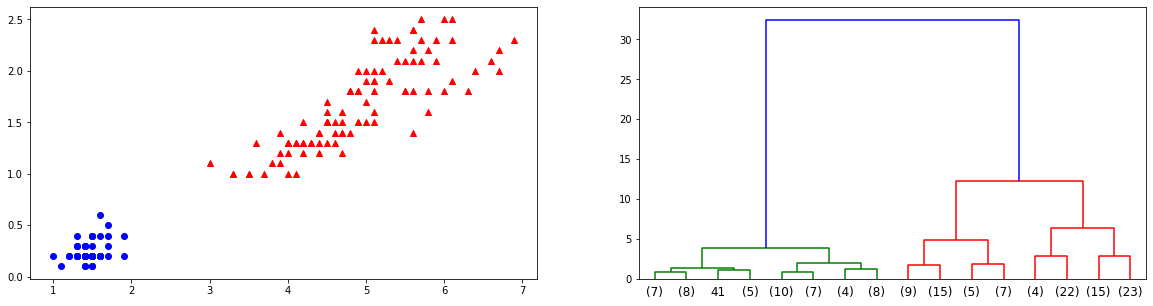

In [28]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, ax, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs, ax=ax)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
for i, data in enumerate(zip(X[:, 2], X[:, 3])):
    if result[i] == 0:
        ax[0].scatter(data[0], data[1], c="red", marker="^")
    elif result[i] == 1:
        ax[0].scatter(data[0], data[1], c="blue", marker="o")
    else :
        ax[0].scatter(data[0], data[1], c="orange", marker="*")
plot_dendrogram(agc_dendrogram, ax=ax[1], truncate_mode='level', p=3)
fig.show()